In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("AirlineScrappedReview.csv")
df

,Passanger_Name,Flying_month,Route,Rating,Verified,Review_title,Review_content,Traveller_type,Class
0,Paige Boet,June 2023,New Orleans to London,1.0,Trip Verified,The airline lost my luggage,The airline lost my luggage and was absolutely...,Solo Leisure,Economy Class
1,S Layne,March 2023,London to Amman,1.0,Trip Verified,fully refunded by our travel insurance,"We booked on the BA website, round trip flight...",Couple Leisure,Business Class
2,E Lanewoski,Heathrow to Bodrum,Business Class,2.0,Trip Verified,no boarding drinks provided,"First time flying with BA business class, neve...",A321 neo,Solo Leisure
3,Joel Burman,June 2023,Amman to London,4.0,Not Verified,WiFi didn't work,You can buy sandwiches and crisps but don't ex...,Solo Leisure,Economy Class
4,R Vines,London City to Ibiza,Business Class,7.0,Trip Verified,stick with economy,This is a two-for-one review covering economy ...,Embraer 190,Family Leisure
...,...,...,...,...,...,...,...,...,...
3575,W Benson,NaN,NaN,4.0,NaN,British Airways customer review,LHR-HKG on Boeing 747 - 23/08/12. Much has bee...,Economy Class,no
3576,S Luqman,NaN,NaN,4.0,NaN,British Airways customer review,Just got back from Bridgetown Barbados flying ...,Economy Class,no
3577,D Smith,NaN,NaN,4.0,NaN,British Airways customer review,LHR-JFK-LAX-LHR. Check in was ok apart from be...,Economy Class,no
3578,W Benson,NaN,NaN,6.0,NaN,British Airways customer review,HKG-LHR in New Club World on Boeing 777-300 - ...,Business Class,yes


In [3]:
df.columns

Index(['Passanger_Name', 'Flying_month', 'Route', 'Rating', 'Verified',
       'Review_title', 'Review_content', 'Traveller_type', 'Class'],
      dtype='object')

In [4]:
df["Rating"].value_counts()

Rating
1.0     805
2.0     409
3.0     396
8.0     361
10.0    326
7.0     309
9.0     304
4.0     246
5.0     230
6.0     189
Name: count, dtype: int64

# Analyzing Ratings Distribution
This will help us understand the frequency of each rating in the data.

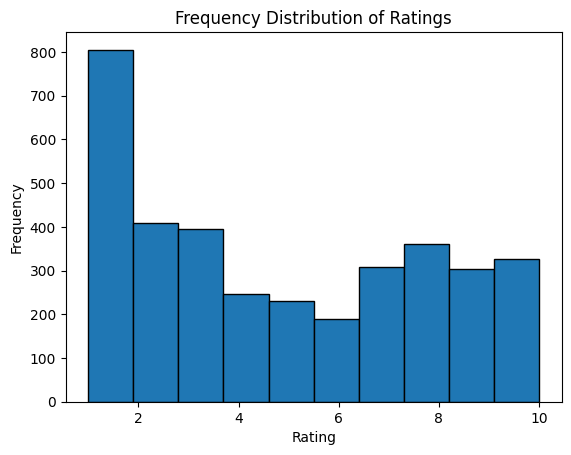

In [5]:
import matplotlib.pyplot as plt

plt.hist(df['Rating'], bins=10, edgecolor='black')
plt.title('Frequency Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

# Analyzing Ratings Over Months

In this analysis, we are going to plot the average ratings over different months. This will help us understand how the ratings vary over time.
Plot the mean ratings over months

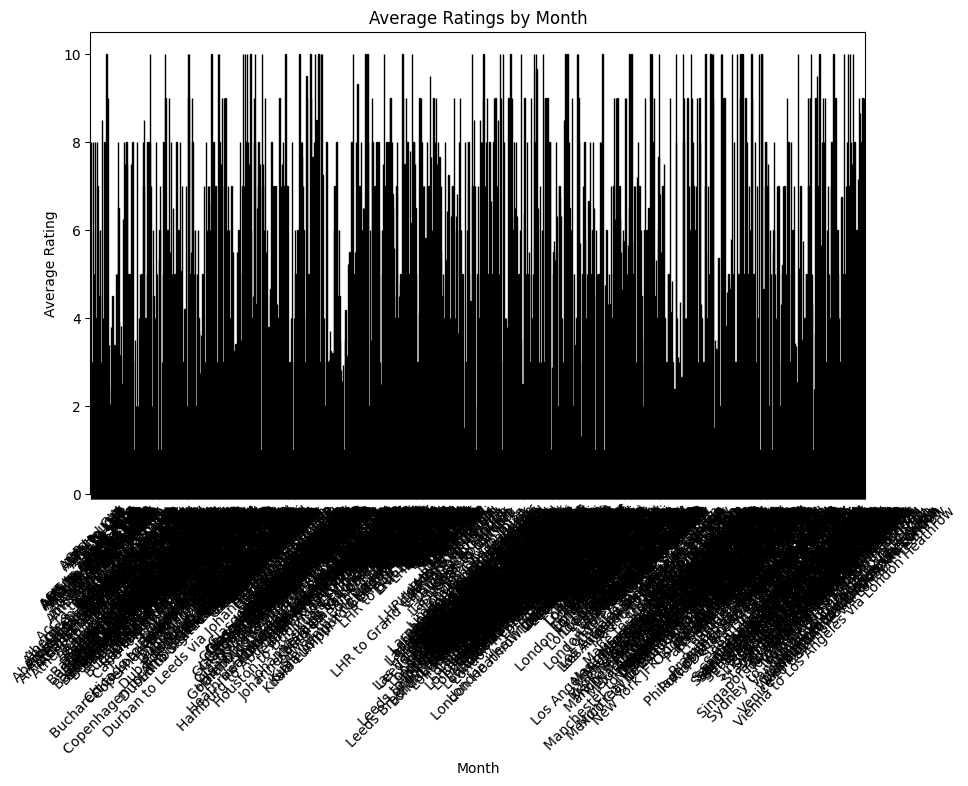

In [6]:
mean_ratings = df.groupby('Flying_month')['Rating'].mean()

plt.figure(figsize=(10, 6))
mean_ratings.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Average Ratings by Month')
plt.xlabel('Month')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.show()


In [7]:
df["Flying_month"].value_counts()

Flying_month
August 2015                                     25
March 2023                                      23
September 2015                                  22
April 2017                                      21
December 2016                                   21
                                                ..
London Gatwick to Valencia                       1
Toronto to Geneva via London                     1
London City to Milan                             1
Boston to Geneva via Heathrow                    1
Leeds Bradford to Geneva via London Heathrow     1
Name: count, Length: 1174, dtype: int64

# Analyzing Ratings by Traveller Type

In this analysis, we are going to plot the ratings by traveller type. This will help us understand how the ratings vary for different types of travellers.

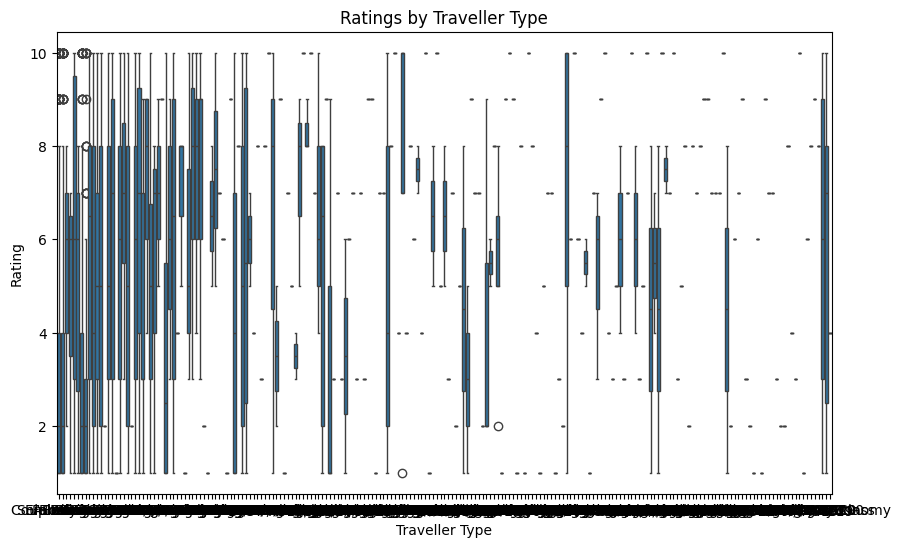

In [8]:
import seaborn as sns

# Plot the average ratings by traveller type
plt.figure(figsize=(10, 6))
sns.boxplot(x='Traveller_type', y='Rating', data=df)
plt.title('Ratings by Traveller Type')
plt.xlabel('Traveller Type')
plt.ylabel('Rating')
plt.show()


In [9]:
df["Traveller_type"].value_counts()

Traveller_type
A320                   342
Economy Class          327
Couple Leisure         308
Solo Leisure           307
Business Class         295
                      ... 
A321Neo                  1
A319 / Boeing 787-8      1
Boeing 757               1
A319/320                 1
no                       1
Name: count, Length: 203, dtype: int64

In [10]:
df["Class"].value_counts()

Class
Economy Class                              676
Couple Leisure                             641
Solo Leisure                               553
yes                                        441
Business                                   430
no                                         322
Family Leisure                             234
Business Class                             183
Premium Economy                             85
First Class                                 11
London to Malaga                             1
LHR to ORD                                   1
Los Angeles to London to Paris to Rome       1
Name: count, dtype: int64

# Analyzing Class Distribution

In this analysis, we are going to plot the distribution of 'Class' in the dataset. This will help us understand the frequency of each class in the data.

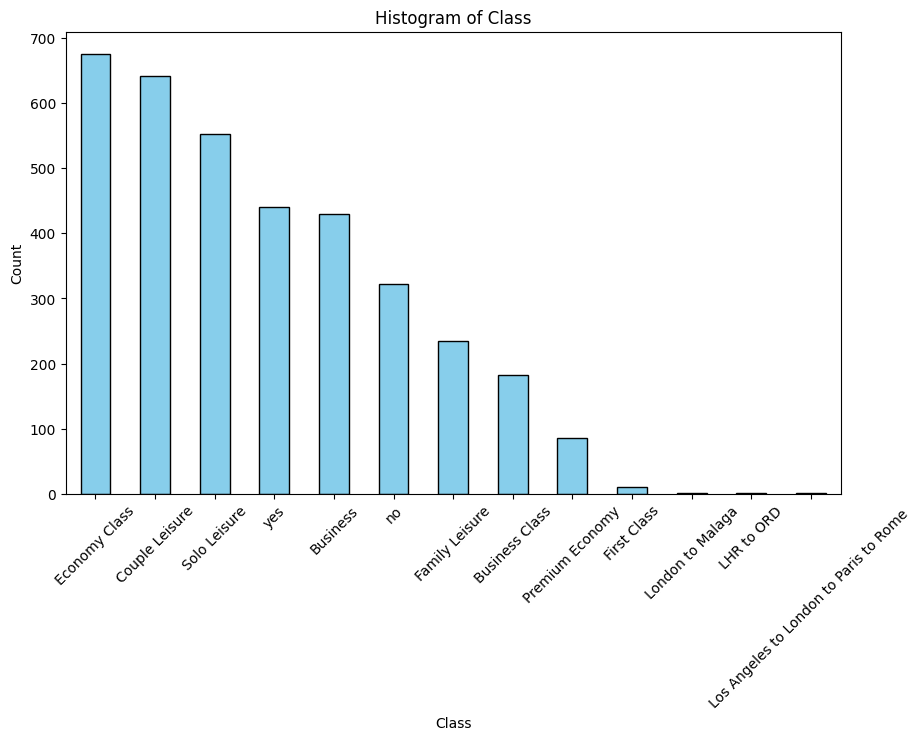

In [11]:
plt.figure(figsize=(10, 6))
df['Class'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Histogram of Class')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


# Analyzing Review Content with TF-IDF

In this analysis, we are going to use Term Frequency-Inverse Document Frequency (TF-IDF) to analyze the content of the reviews. This will help us understand the importance of each word in the context of the reviews.

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer



# Initialize a TfidfVectorizer
vectorizer = TfidfVectorizer(sublinear_tf=True, encoding='utf-8', decode_error='ignore', stop_words='english')

# Fit and transform the 'Review_content' column
tfidf = vectorizer.fit_transform(df['Review_content'])

# Get the feature names
feature_names = vectorizer.get_feature_names_out()

# Get the tf-idf scores of each word in each document
scores = tfidf.toarray()

# Print the top 10 words with highest tf-idf score in each document
for i in range(scores.shape[0]):
    print(f"Review {i+1}:")
    for word, score in sorted(zip(feature_names, scores[i]), key=lambda x: -x[1])[:10]:
        print(f"{word}: {score}")


Review 1:
appease: 0.2330020024754568
begging: 0.22471105864909044
fixing: 0.22471105864909044
sucks: 0.22471105864909044
hotel: 0.22195767232355565
answering: 0.21302562963981558
everyday: 0.21302562963981558
ship: 0.21302562963981558
phone: 0.19779527781212536
updates: 0.1783273573280704
Review 2:
credits: 0.26879698113149664
rules: 0.19752223355523643
amman: 0.17844554988857186
explanations: 0.1757543603473038
ticketing: 0.1757543603473038
nyc: 0.16539769635912047
refund: 0.15021708312983867
website: 0.13864881590113418
receive: 0.12874179693435872
ambulance: 0.12808320173427049
Review 3:
bodrum: 0.454878277543511
appear: 0.30979030210185904
quality: 0.30012085929637466
chaos: 0.28460913116575987
standards: 0.23641790620954534
forward: 0.22764264082357713
business: 0.21518506057665937
looking: 0.21061604165087114
provided: 0.21005794758637816
class: 0.20436750289010477
Review 4:
prebooking: 0.35498030718852586
recognise: 0.302601852670885
body: 0.2876891494712406
shop: 0.26803813460

# Analyzing Most Frequent Words in Reviews

In this analysis, we are going to plot the most frequent words in the reviews. This will help us understand the common themes or topics in the reviews.

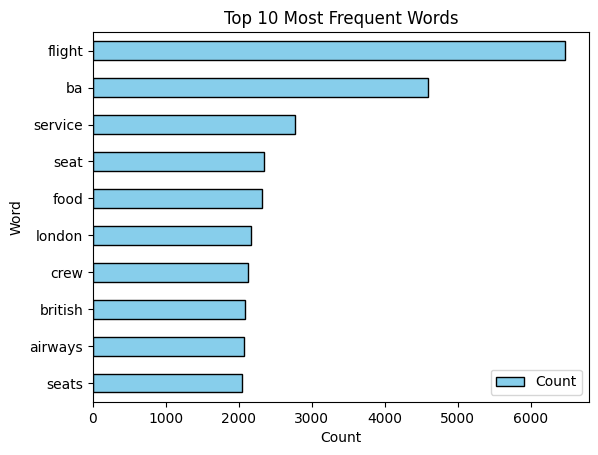

In [13]:
from sklearn.feature_extraction.text import CountVectorizer
# Initialize a CountVectorizer
vectorizer = CountVectorizer(stop_words='english')

# Fit and transform the 'Review_content' column
counts = vectorizer.fit_transform(df['Review_content'])

# Sum up the counts of each word
sum_counts = counts.sum(axis=0)

# Get the feature names
feature_names = vectorizer.get_feature_names_out()

# Create a DataFrame of words and their counts
df_counts = pd.DataFrame(sum_counts, columns=feature_names).T
df_counts.columns = ['Count']

# Sort by count
df_counts = df_counts.sort_values(by='Count', ascending=False)

# Plot the top 10 most frequent words
df_counts.head(10).plot(kind='barh', color='skyblue', edgecolor='black')
plt.title('Top 10 Most Frequent Words')
plt.xlabel('Count')
plt.ylabel('Word')
plt.gca().invert_yaxis()
plt.show()